In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv("zomato.csv",encoding='ISO-8859-1')

In [4]:
data1.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data1.describe().round(2)

Restaurant ID  Country Code  Longitude  Latitude  Average Cost for two  \
count        9551.00       9551.00    9551.00   9551.00               9551.00   
mean      9051128.35         18.37      64.13     25.85               1199.21   
std       8791521.28         56.75      41.47     11.01              16121.18   
min            53.00          1.00    -157.95    -41.33                  0.00   
25%        301962.50          1.00      77.08     28.48                250.00   
50%       6004089.00          1.00      77.19     28.57                400.00   
75%      18352291.50          1.00      77.28     28.64                700.00   
max      18500652.00        216.00     174.83     55.98             800000.00   

       Price range  Aggregate rating     Votes  
count      9551.00           9551.00   9551.00  
mean          1.80              2.67    156.91  
std           0.91              1.52    430.17  
min           1.00              0.00      0.00  
25%           1.00              2.50      5.00  
50%           2.00              3.20     31.00  
75%           2.00              3.70    131.00  
max           4.00              4.90  10934.00

In [7]:
data1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
data1.duplicated().sum()

0

In [9]:
Q1 = data1['Average Cost for two'].quantile(0.25)
Q3 = data1['Average Cost for two'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
outliers_cost = data1[(data1['Average Cost for two'] < lower)| (data1['Average Cost for two'] > upper)]
print("Outliers in Average cost of two:",len(outliers_cost))

Outliers in Average cost of two: 853


Data Cleaaning


In [10]:
data1['Cuisines'] = data1['Cuisines'].fillna("Not specified")

In [11]:
data1 = data1[(data1['Average Cost for two'] >= lower) & (data1['Average Cost for two'] <= upper)]

In [12]:
Q1 = data1['Average Cost for two'].quantile(0.25)
Q3 = data1['Average Cost for two'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers_cost = data1[(data1['Average Cost for two'] < lower)| (data1['Average Cost for two'] > upper)]
print("Outliers in Average cost of two:",len(outliers_cost))



Outliers in Average cost of two: 240


Country Code Dataset

In [13]:
data2 = pd.read_excel("Country-Code.xlsx")

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [15]:
data2.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [16]:
data2.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [17]:
data2.duplicated().sum()

0

In [18]:
data2.describe()

Country Code
count     15.000000
mean     137.933333
std       80.009345
min        1.000000
25%       65.500000
50%      166.000000
75%      199.500000
max      216.000000

Merge the country sheet and Zomato file to get the country code

In [19]:
Merg_data = data1.merge(data2, how='left')

In [20]:
Merg_data.to_csv("Merge Data.csv", index = False)

In [21]:
Merg_data.head()

Restaurant ID   Restaurant Name  Country Code              City  \
0        6317637  Le Petit Souffle           162       Makati City   
1        6304287  Izakaya Kikufuji           162       Makati City   
2       18189371      Din Tai Fung           162  Mandaluyong City   
3        6314987          Locavore           162        Pasig City   
4        6309903  Silantro Fil-Mex           162        Pasig City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Ground Floor, Mega Fashion Hall, SM Megamall, ...   
3  Brixton Technology Center, 10 Brixton Street, ...   
4       75 East Capitol Drive, Kapitolyo, Pasig City   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2      SM Megamall, Ortigas, Mandaluyong City   
3                                   Kapitolyo   
4                                   Kapitolyo   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056314  14.583764   
3                              Kapitolyo, Pasig City  121.056532  14.572041   
4                              Kapitolyo, Pasig City  121.057916  14.567689   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   
2                     Chinese  ...                 No                  No   
3                    Filipino  ...                Yes                  No   
4           Filipino, Mexican  ...                 No                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   
2                No                   No           3              4.4   
3                No                   No           3              4.8   
4                No                   No           3              4.9   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  
2         Green    Very Good   336  Phillipines  
3    Dark Green    Excellent   532  Phillipines  
4    Dark Green    Excellent  1070  Phillipines  

[5 rows x 22 columns]

In [22]:
Merg_data.describe().round(2)

Restaurant ID  Country Code  Longitude  Latitude  Average Cost for two  \
count        8698.00       8698.00    8698.00   8698.00               8698.00   
mean      9380834.26         19.28      62.90     25.91                437.85   
std       8796514.74         58.40      43.04     11.24                282.05   
min            55.00          1.00    -157.95    -41.33                  0.00   
25%        303052.50          1.00      77.08     28.48                250.00   
50%       6901312.50          1.00      77.19     28.57                400.00   
75%      18357947.50          1.00      77.28     28.65                600.00   
max      18500652.00        216.00     174.83     55.98               1350.00   

       Price range  Aggregate rating    Votes  
count      8698.00           8698.00  8698.00  
mean          1.64              2.56   119.95  
std           0.77              1.53   325.43  
min           1.00              0.00     0.00  
25%           1.00              2.20     4.00  
50%           1.00              3.10    25.00  
75%           2.00              3.60   103.00  
max           4.00              4.90  9667.00

In [23]:
Merg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8698 non-null   int64  
 1   Restaurant Name       8698 non-null   object 
 2   Country Code          8698 non-null   int64  
 3   City                  8698 non-null   object 
 4   Address               8698 non-null   object 
 5   Locality              8698 non-null   object 
 6   Locality Verbose      8698 non-null   object 
 7   Longitude             8698 non-null   float64
 8   Latitude              8698 non-null   float64
 9   Cuisines              8698 non-null   object 
 10  Average Cost for two  8698 non-null   int64  
 11  Currency              8698 non-null   object 
 12  Has Table booking     8698 non-null   object 
 13  Has Online delivery   8698 non-null   object 
 14  Is delivering now     8698 non-null   object 
 15  Switch to order menu 

In [24]:
Merg_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [25]:
Merg_data.dropna(inplace=True)

Get the Top rated restaurants in each city in India(On the basis of rating and votes)

In [28]:
top_rated = Merg_data[Merg_data['Aggregate rating'] > 0]
top_rated = top_rated.sort_values(['City','Aggregate rating', 'Votes'], ascending=[True,False, False])
top_restaurents_by_city = top_rated.groupby('City').first().reset_index()

top_restaurents_by_city[['Restaurant Name', 'City','Aggregate rating','Votes','Country']]

Restaurant Name             City  \
0                                Punjab Grill        Abu Dhabi   
1                             Sheroes Hangout             Agra   
2                                    Cryo Lab        Ahmedabad   
3                           Jimmie's Hot Dogs           Albany   
4                                      Eat On        Allahabad   
..                                        ...              ...   
130  Theo Yianni's Authentic Greek Restaurant          Weirton   
131                                The Hangar  Wellington City   
132                 Fishpatrick's Crabby Cafe   Winchester Bay   
133                             Arigato Sushi          Yorkton   
134                                 Starbucks        ÛÁstanbul   

     Aggregate rating  Votes        Country  
0                 4.9    216            UAE  
1                 4.9     77          India  
2                 4.6    166          India  
3                 3.9    160  United States  
4                 3.7    105          India  
..                ...    ...            ...  
130               3.9    156  United States  
131               4.6    171    New Zealand  
132               3.2     16  United States  
133               3.3     26         Canada  
134               4.9   1042         Turkey  

[135 rows x 5 columns]

In [ ]:
correlation = Merg_data[['Aggregate rating', 'Votes']].corr()
print(correlation)

                  Aggregate rating     Votes
Aggregate rating          1.000000  0.322728
Votes                     0.322728  1.000000


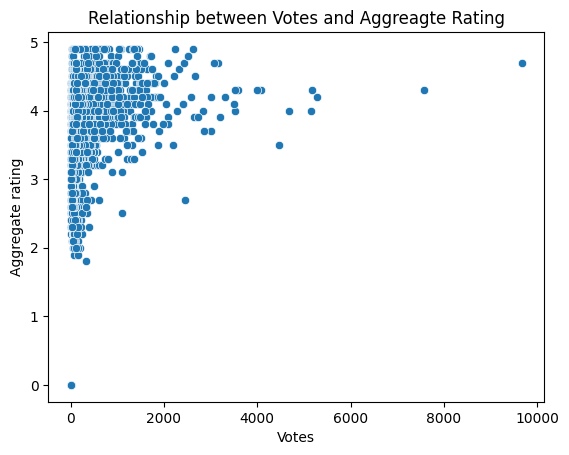

In [32]:
sns.scatterplot(data=Merg_data, x='Votes', y='Aggregate rating')
plt.title("Relationship between Votes and Aggreagte Rating")
plt.show()

No of Restaurants in each country

In [53]:
value_count = Merg_data['Country'].value_counts().reset_index(name = 'No of Restaurants')
print(value_count)

           Country  No of Restaurants
0            India               7847
1    United States                434
2   United Kingdom                 80
3           Brazil                 60
4              UAE                 60
5     South Africa                 58
6      New Zealand                 40
7           Turkey                 34
8        Australia                 24
9        Singapore                 20
10           Qatar                 20
11     Phillipines                 13
12          Canada                  4
13       Sri Lanka                  4


Top 5 restaurants with online delivery

In [40]:
online_delivery = Merg_data[Merg_data['Has Online delivery'] == 'Yes']
top_online_delivery = online_delivery.sort_values(['Aggregate rating', 'Votes'], ascending=False)
top_online_delivery = top_online_delivery[['Restaurant Name', 'City', 'Aggregate rating', 'Votes', 'Country']].head(5)
print(top_online_delivery)

         Restaurant Name        City  Aggregate rating  Votes Country
2692  Naturals Ice Cream   New Delhi               4.9   2620   India
1273         Caterspoint     Gurgaon               4.9    223   India
798              CakeBee  Coimbatore               4.9    200   India
715             Truffles   Bangalore               4.7   9667   India
2209  The Fusion Kitchen      Mumbai               4.7   2083   India


Cheap but best restaurants available in a city

In [50]:
cheap_best = Merg_data[(Merg_data['Average Cost for two'] <= 400) & (Merg_data['Aggregate rating'] >= 4)]
cheap_best_sorted = cheap_best.sort_values(['City', 'Aggregate rating'], ascending=[True, False])
cheap_best_city = cheap_best_sorted.groupby('City').first().reset_index()
cheap_best_city = cheap_best_city[['Restaurant Name', 'City' , 'Average Cost for two','Aggregate rating']].head(10)
print(cheap_best_city)

          Restaurant Name        City  Average Cost for two  Aggregate rating
0            Punjab Grill   Abu Dhabi                   330               4.9
1         Sheroes Hangout        Agra                     0               4.9
2                Cryo Lab   Ahmedabad                   350               4.6
3  Gurdas Ram Jalebi Wala    Amritsar                   100               4.1
4            Gaga Manjero      Ankara                    80               4.9
5               Sr. Sol 1      Athens                    10               4.6
6                   Milse    Auckland                    50               4.9
7      Rae's Coastal Cafe     Augusta                    40               4.9
8              Eat Street   Bangalore                   400               4.3
9     Bridge Road Brewers  Beechworth                    20               4.6


Top cuisines in each region

In [56]:
top_cousines = Merg_data.groupby(['Country', 'Cuisines']).size().reset_index(name = 'Count')
top_cousines = top_cousines.sort_values(['Country','Count'], ascending=[True, False])
top_cousines_by_country = top_cousines.groupby('Country').first().reset_index()
top_cousines_by_country

Country                   Cuisines  Count
0        Australia  Breakfast, Coffee and Tea      2
1           Brazil                  Brazilian      8
2           Canada                      Asian      1
3            India               North Indian    904
4      New Zealand                       Cafe      5
5      Phillipines                   Filipino      3
6            Qatar                     Indian      5
7        Singapore                     French      2
8     South Africa                    Mexican      3
9        Sri Lanka           Desserts, Bakery      1
10          Turkey                       Cafe      6
11             UAE                     Indian      5
12  United Kingdom                    Italian      7
13   United States                    Mexican     25

Aggregate rating of all the restaurants in each city in a country

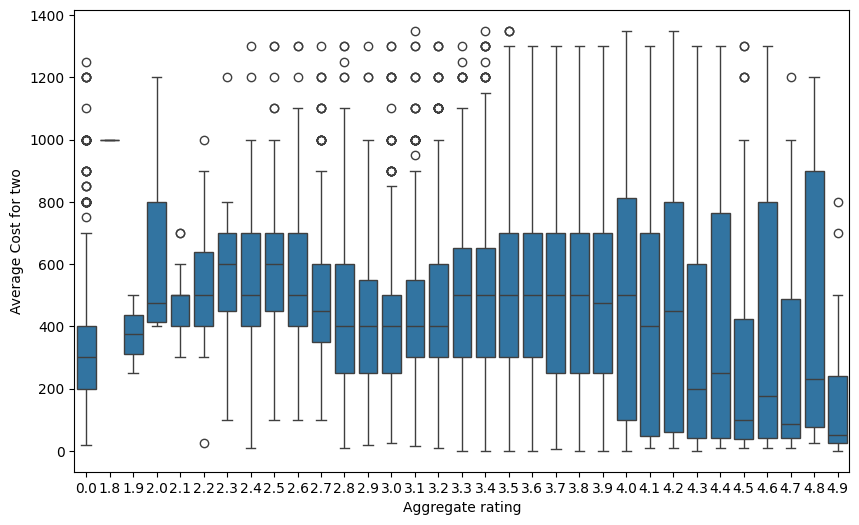

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Aggregate rating', y='Average Cost for two', data=Merg_data)
plt.title=("Dose Rating Influence Cost?")
plt.xlabel=('Aggregate Rating')
plt.ylabel=('Average Cost for Two')
plt.show()

Does rating influences the cost of restaurant? (Draw pieplot for this)

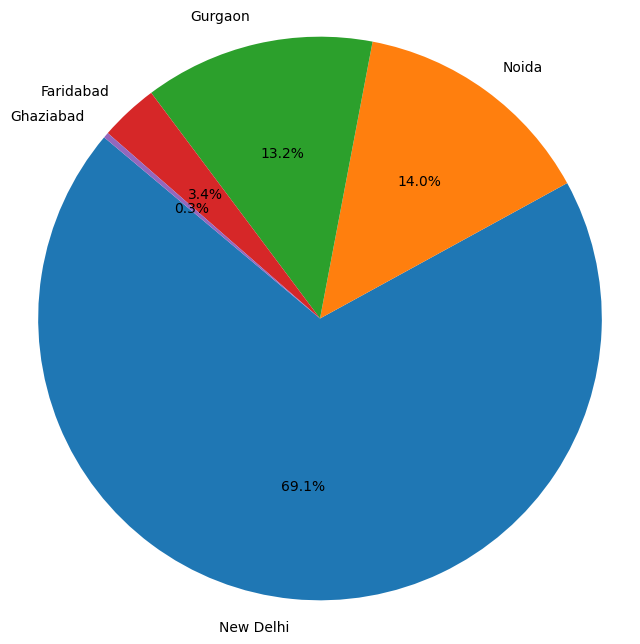

In [70]:
top_cities = Merg_data['City'].value_counts().head(5)
plt.figure(figsize=(8,8))
plt.pie(top_cities, labels = top_cities.index, autopct = '%1.1f%%', startangle=140)
# plt.title("Top 5 Cities by Resturent Share")
plt.axis('equal')
plt.show()

Top Percentage cover of restaurants in a Country.(Draw pie graph for this)

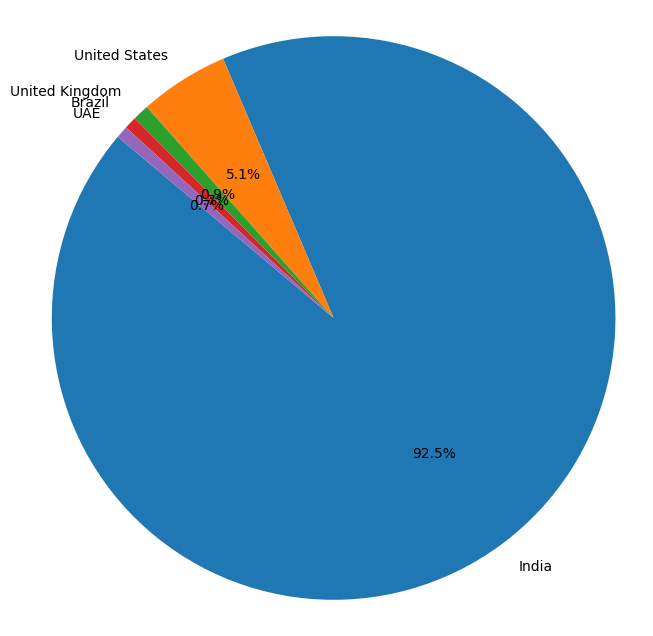

In [77]:
country_data = Merg_data[Merg_data['Cuisines'].notnull()]
country_cuisines = country_data['Country'].value_counts().head(5)

plt.figure(figsize=(8,8))
plt.pie(country_cuisines, labels=country_cuisines.index, autopct='%1.1f%%', startangle=140)
# plt.title("Top 5 Cuisines in Country Resturant")
plt.axis('equal')
plt.show()

Top cuisines in Indian restaurants.( Draw pie graph for this)

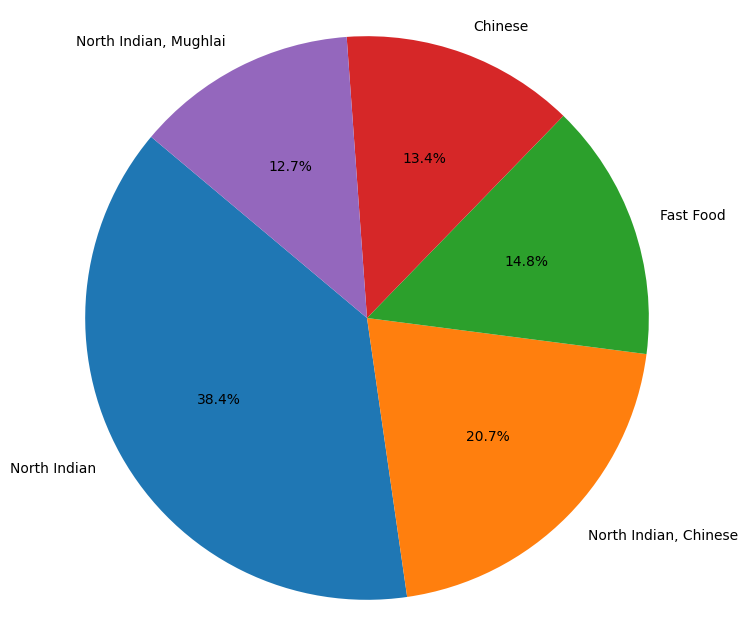

In [78]:
india_data = Merg_data[Merg_data['Country'] == 'India']
india_cuisines = india_data['Cuisines'].value_counts().head(5)

plt.figure(figsize=(8,8))
plt.pie(india_cuisines,labels = india_cuisines.index, autopct='%1.1f%%', startangle=140)
# plt.title("Top 5 cuisines in indian Resturant")
plt.axis('equal')
plt.show()